In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf
import matplotlib.lines as mlines

# Load Frequency Data

In [2]:
ds1 = xr.open_dataset('../data/processed/WBTthresholds/thres25.nc').rename({'Frequencies':'freq25'})
ds2 = xr.open_dataset('../data/processed/WBTthresholds/thres27.9.nc').rename({'Frequencies':'freq27.9'})
ds3 = xr.open_dataset('../data/processed/WBTthresholds/thres30.nc').rename({'Frequencies':'freq30'})

ds = xr.merge([ds1,ds2,ds3])

# Load Area Data

In [3]:
# Load area data
land_area = xr.open_dataset('../data/processed/wbt.land_area')
land_mask = np.isfinite(land_area)
# Replace NaN with 0 
land_area_adj = land_area.where(land_mask,0).rename({'__xarray_dataarray_variable__':'land_area'})
land_area_adj = land_area_adj['land_area'].isel(ensemble=0)

# Area Fraction Function

In [4]:
def area_frac(ds,area,region,ax,thres):
    # Isolate data for region
    ds_area = mf.slice_region(area,region)
    ds_region = mf.slice_region(ds,region)
    
    # Is fractional frequency of past-threshold days high enough?
    ds_thres = (ds_region.sum('ensemble')/(5*365)) > thres
    
    # Area-weighted fraction of region w/ high enough frequency
    frac = (ds_thres*ds_area).sum(['lat','lon'])/ds_area.sum()
    
    frac['freq25'].plot(ax=ax,color='royalblue')
    frac['freq27.9'].plot(ax=ax,color='#2ca02c')
    frac['freq30'].plot(ax=ax,color='orange')
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Fraction of Regional Area')
    ax.legend(['25   $^\circ$C','27.9$^\circ$C','30   $^\circ$C'],loc='upper left')
    ax.set_title('Fraction of ' + region + ' With Heat Stress Frequency > ' + str(thres))
    ax.set_ylim([0,1])

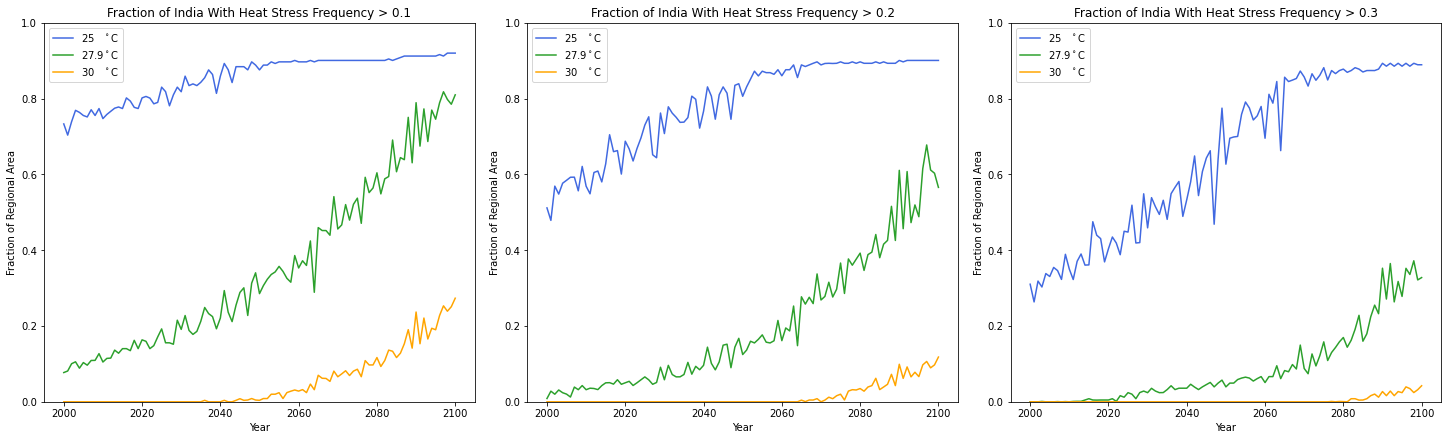

In [103]:
fig,axs=plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)

area_frac(ds,land_area_adj,'India',axs[0],0.1)
area_frac(ds,land_area_adj,'India',axs[1],0.2)
area_frac(ds,land_area_adj,'India',axs[2],0.3)

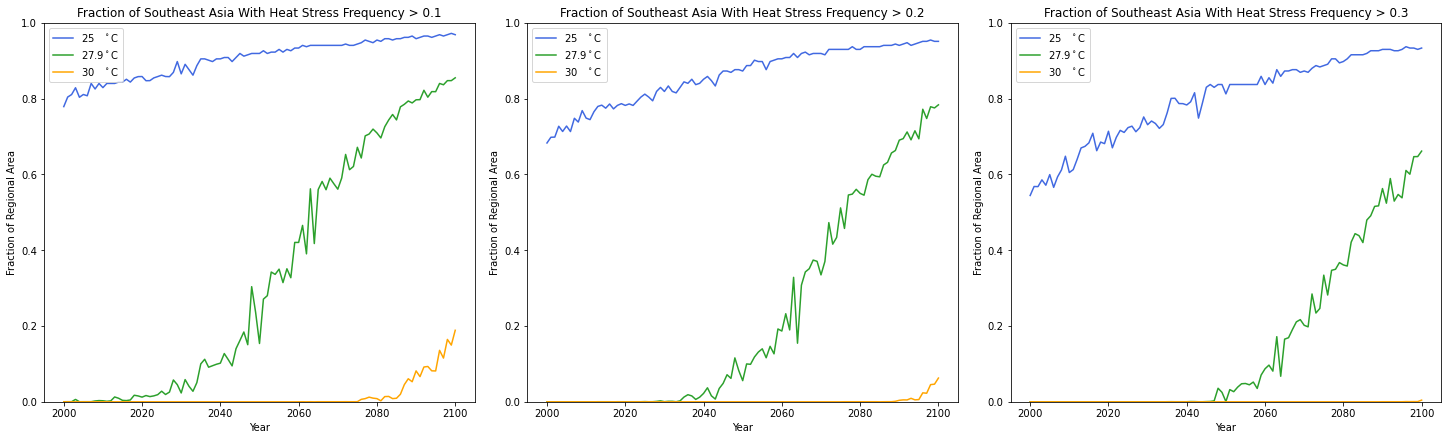

In [104]:
fig,axs=plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)

area_frac(ds,land_area_adj,'Southeast Asia',axs[0],0.1)
area_frac(ds,land_area_adj,'Southeast Asia',axs[1],0.2)
area_frac(ds,land_area_adj,'Southeast Asia',axs[2],0.3)

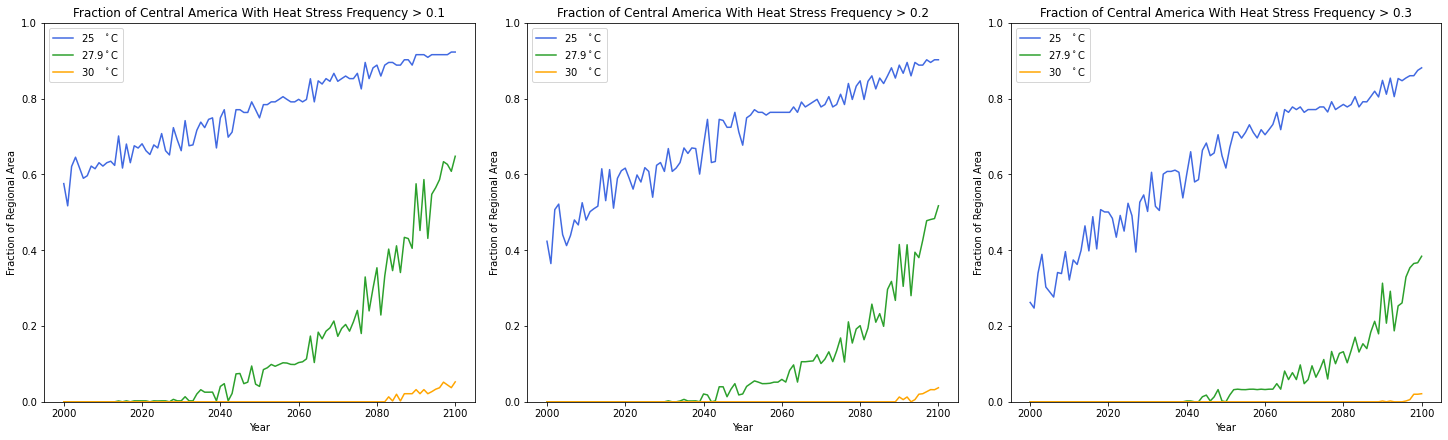

In [105]:
fig,axs=plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)

area_frac(ds,land_area_adj,'Central America',axs[0],0.1)
area_frac(ds,land_area_adj,'Central America',axs[1],0.2)
area_frac(ds,land_area_adj,'Central America',axs[2],0.3)

# Grid Points Function

In [5]:
def point_map(ds,area,region,ax):
    # Isolate data for region
    ds_area = mf.slice_region(area,region)
    ds_region = mf.slice_region(ds,region)
    
    # Fractional frequency of past-threshold days
    ds_frac = (ds_region.sum('ensemble')/(5*365))
    
    # Get for each grid point
    ds_frac_adj = ds_frac.stack(xy=('lon','lat'))
    
    # Plot individual gridpoints
    ds_frac_adj['freq25'].plot.line(hue='xy',add_legend=False,color='royalblue',alpha=0.15,linewidth=0.5,ax=ax)
    ds_frac_adj['freq27.9'].plot.line(hue='xy',add_legend=False,color='#2ca02c',alpha=0.15,linewidth=0.5,ax=ax)
    ds_frac_adj['freq30'].plot.line(hue='xy',add_legend=False,color='orange',alpha=0.15,linewidth=0.5,ax=ax)
    
    # Area-weighted average frequency
    freq_avg = (ds_frac*ds_area).sum(['lon','lat'])/ds_area.sum()
    
    # Plot average frequencies
    freq_avg['freq25'].plot(color='royalblue',linewidth=3,ax=ax)
    freq_avg['freq27.9'].plot(color='#2ca02c',linewidth=3,ax=ax)
    freq_avg['freq30'].plot(color='orange',linewidth=3,ax=ax)
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Frequency')
    ax.set_title(region)
    
    blue_line = mlines.Line2D([], [], color='royalblue', label='> 25   $^\circ$C',linewidth=2)
    green_line = mlines.Line2D([], [], color='#2ca02c', label='> 27.9$^\circ$C',linewidth=2)
    orange_line = mlines.Line2D([], [], color='orange', label='> 30   $^\circ$C',linewidth=2)
    ax.legend(handles=[blue_line,green_line,orange_line],loc='upper left');

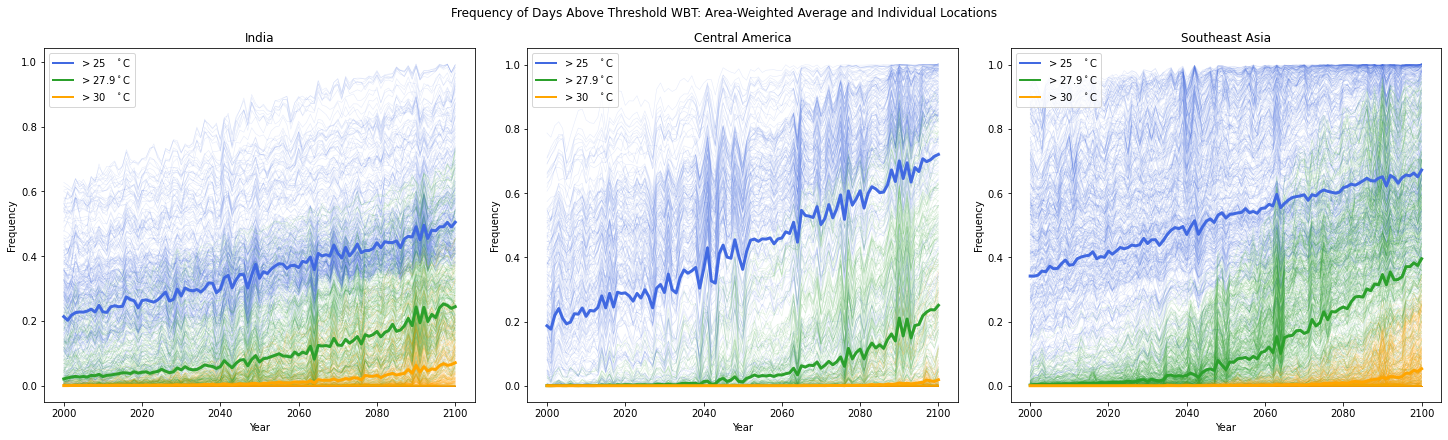

In [86]:
fig,axs=plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)

point_map(ds,land_area_adj,'India',axs[0])
point_map(ds,land_area_adj,'Central America',axs[1])
point_map(ds,land_area_adj,'Southeast Asia',axs[2])

fig.suptitle('Frequency of Days Above Threshold WBT: Area-Weighted Average and Individual Locations');

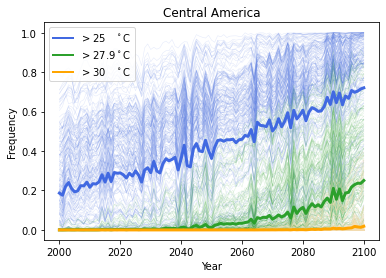

In [75]:
region = 'Central America'

fig,ax=plt.subplots()
point_map(ds,land_area_adj,region,ax)

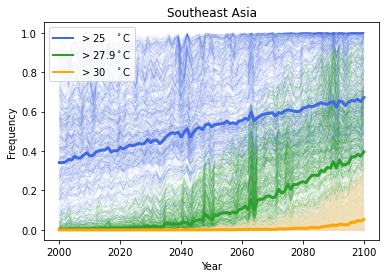

In [81]:
region = 'Southeast Asia'

fig,ax=plt.subplots()
point_map(ds,land_area_adj,region,ax)

# Indonesia

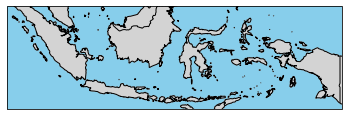

In [23]:
mf.map_region('Indonesia')

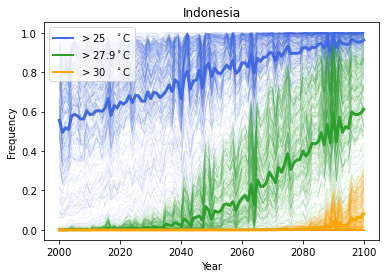

In [22]:
region = 'Indonesia'

fig,ax=plt.subplots()
point_map(ds,land_area_adj,region,ax)

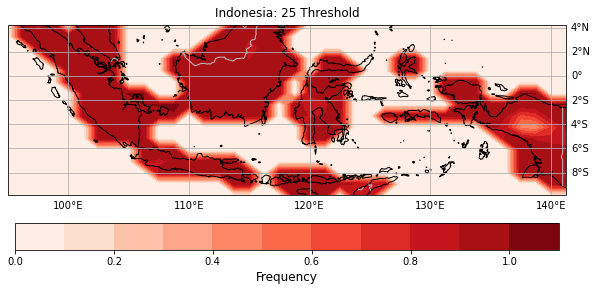

In [33]:
ds_region = mf.slice_region(ds,'Indonesia').sel(year=slice(2090,None))
ds_frac = (ds_region.sum(['ensemble'])/(5*365)).mean(dim='year')

mf.contour_plot(ds_frac['freq25'],'Indonesia','Indonesia: 25 Threshold','Reds',borders=True,label='Frequency')

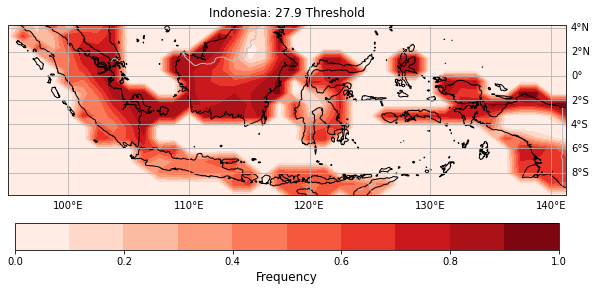

In [34]:
mf.contour_plot(ds_frac['freq27.9'],'Indonesia','Indonesia: 27.9 Threshold','Reds',borders=True,label='Frequency')

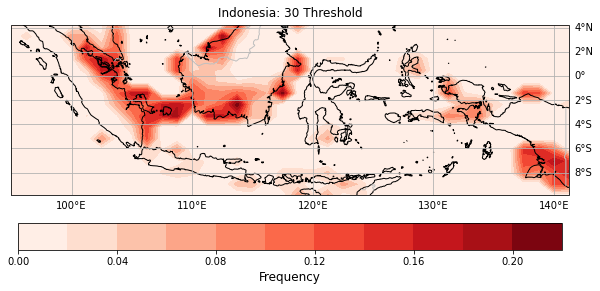

In [35]:
mf.contour_plot(ds_frac['freq30'],'Indonesia','Indonesia: 30 Threshold','Reds',borders=True,label='Frequency')

# Philippines

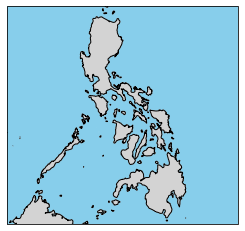

In [37]:
mf.map_region('Philippines')

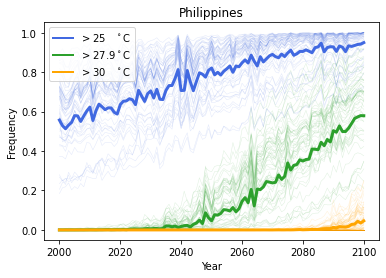

In [38]:
region = 'Philippines'

fig,ax=plt.subplots()
point_map(ds,land_area_adj,region,ax)

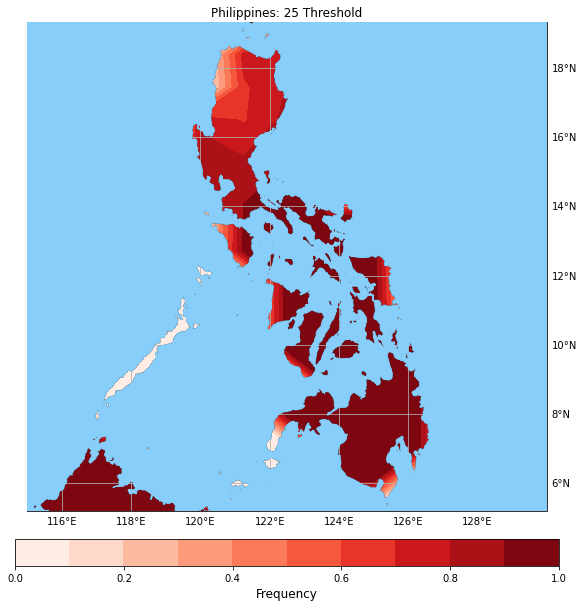

In [39]:
ds_region = mf.slice_region(ds,'Philippines').sel(year=slice(2090,None))
ds_frac = (ds_region.sum(['ensemble'])/(5*365)).mean(dim='year')

mf.contour_plot(ds_frac['freq25'],'Philippines','Philippines: 25 Threshold','Reds',borders=True,label='Frequency')

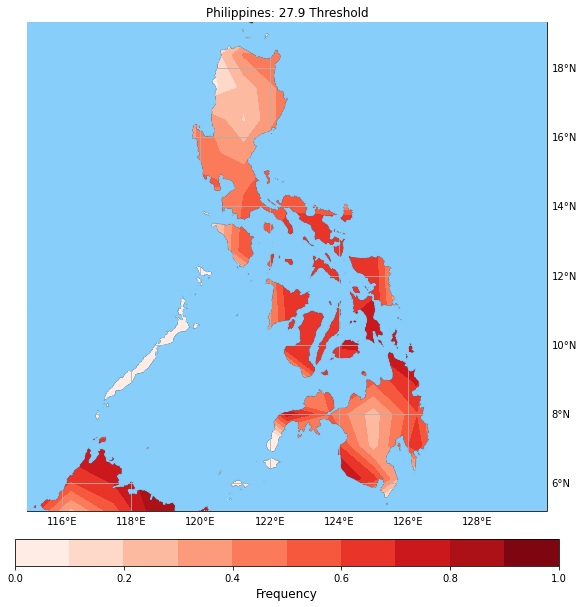

In [40]:
ds_region = mf.slice_region(ds,'Philippines').sel(year=slice(2090,None))
ds_frac = (ds_region.sum(['ensemble'])/(5*365)).mean(dim='year')

mf.contour_plot(ds_frac['freq27.9'],'Philippines','Philippines: 27.9 Threshold','Reds',borders=True,label='Frequency')

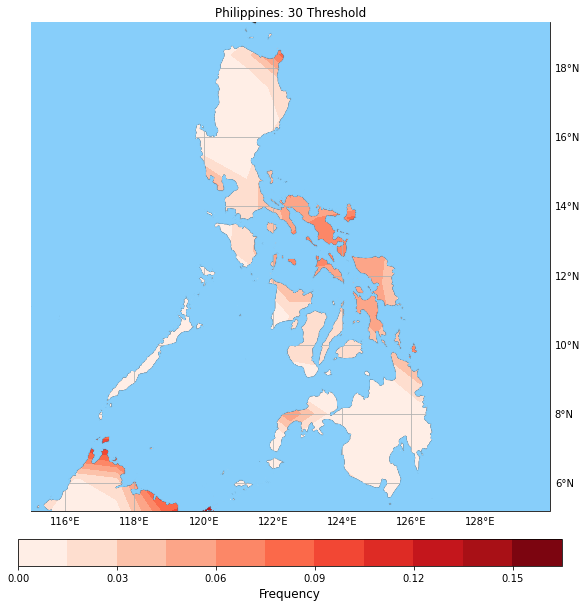

In [41]:
ds_region = mf.slice_region(ds,'Philippines').sel(year=slice(2090,None))
ds_frac = (ds_region.sum(['ensemble'])/(5*365)).mean(dim='year')

mf.contour_plot(ds_frac['freq30'],'Philippines','Philippines: 30 Threshold','Reds',borders=True,label='Frequency')

# India

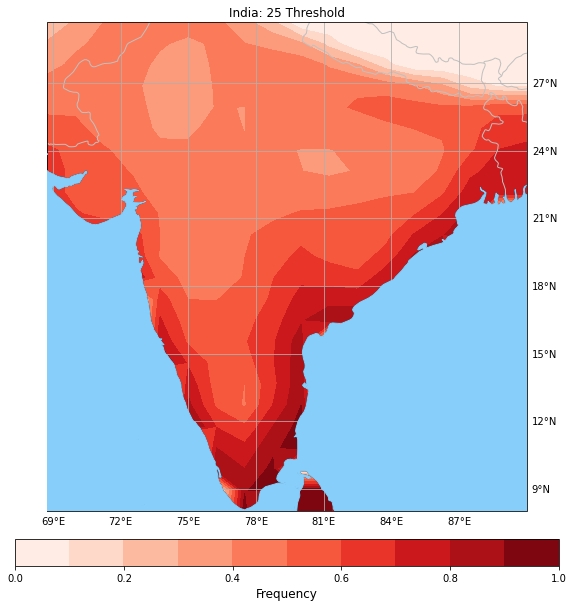

In [42]:
ds_region = mf.slice_region(ds,'India').sel(year=slice(2090,None))
ds_frac = (ds_region.sum(['ensemble'])/(5*365)).mean(dim='year')

mf.contour_plot(ds_frac['freq25'],'India','India: 25 Threshold','Reds',borders=True,label='Frequency')

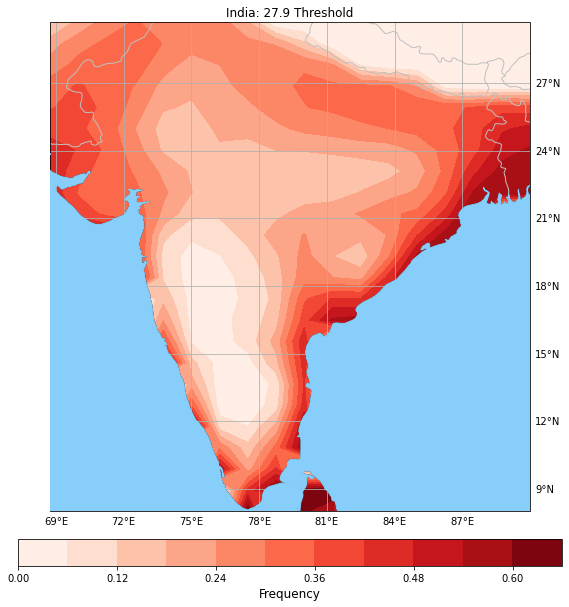

In [43]:
ds_region = mf.slice_region(ds,'India').sel(year=slice(2090,None))
ds_frac = (ds_region.sum(['ensemble'])/(5*365)).mean(dim='year')

mf.contour_plot(ds_frac['freq27.9'],'India','India: 27.9 Threshold','Reds',borders=True,label='Frequency')

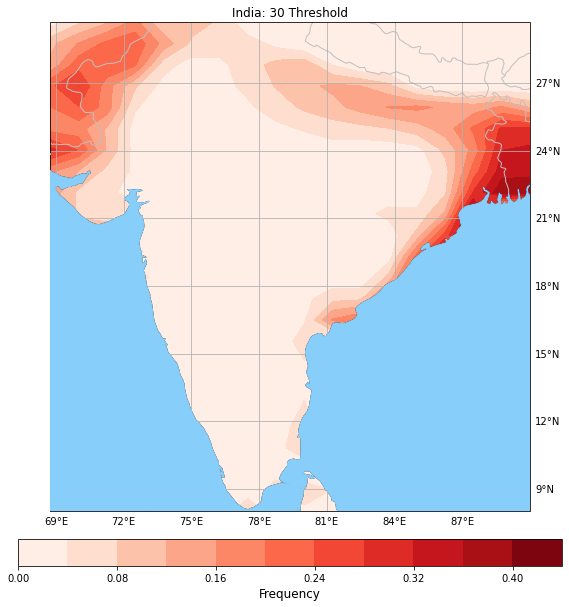

In [44]:
ds_region = mf.slice_region(ds,'India').sel(year=slice(2090,None))
ds_frac = (ds_region.sum(['ensemble'])/(5*365)).mean(dim='year')

mf.contour_plot(ds_frac['freq30'],'India','India: 30 Threshold','Reds',borders=True,label='Frequency')